In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
#trajectory3: delta = .40
#trajectory1: delta = .05 
#trajectory2: delta= .05, tau=5
#trajectory_Ldist_tau500_phi01_eps01
traj = np.load('trajs/trajectory3') #  trajectory_Ldist_tau5_phi01_eps01_fully
delta=5
tau=500

In [3]:
#K = traj['capital']
#print K
#df = pd.DataFrame(K.values,index=K.index)
from pymofa.experiment_handling import even_time_series_spacing
#K = np.zeros(shape=(size, N))

#for a, t in enumerate(traj.index):
#    K[a,:] = traj['capital'][t]
#df = K.apply(pd.Series)
df = pd.DataFrame(traj['capital'].apply(pd.Series), index= traj.index)
del traj
dfk = even_time_series_spacing(df,2000*tau)
print dfk

                     0         1         2         3         4         5  \
0.000000      1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
0.020004      0.993827  0.993363  0.993681  0.993946  0.992751  0.992859   
0.040007      0.987655  0.986727  0.987363  0.987892  0.985503  0.985719   
0.060011      0.981482  0.980090  0.981044  0.981838  0.978254  0.978578   
0.080014      0.975310  0.973453  0.974725  0.975784  0.971005  0.971437   
0.100018      0.969137  0.966816  0.968406  0.969730  0.963756  0.964297   
0.120021      0.962965  0.960180  0.962088  0.963676  0.956508  0.957156   
0.140025      0.956792  0.953543  0.955769  0.957621  0.949259  0.950015   
0.160029      0.950619  0.946906  0.949450  0.951567  0.942010  0.942875   
0.180032      0.944447  0.940269  0.943132  0.945513  0.934762  0.935734   
0.200036      0.938274  0.933633  0.936813  0.939459  0.927513  0.928593   
0.220039      0.932102  0.926996  0.930494  0.933405  0.920264  0.921453   
0.240043    

In [6]:
tau=80
delta=5

In [4]:
N=100
size = 80000#len(traj.index)
S = np.zeros(shape=(size, N))
K = np.zeros(shape=(size, N))
C = np.zeros(shape=(size, N))
w = np.zeros(shape=(size, 1))
r = np.zeros(shape=(size,1))
L = traj['P'][0]
y = np.zeros(shape=(size,1))
idx = traj.index[0:size]
for a, t in enumerate(traj.index[0:size]):
    S[a,:] = traj['s'][t]
    C[a,:] = traj['C'][t]
    K[a,:] = traj['capital'][t]
    w[a,:] = traj['wage'][t]
    r[a,:] = traj['r'][t]
    y[a,:] = traj['Y'][t]
del traj
        


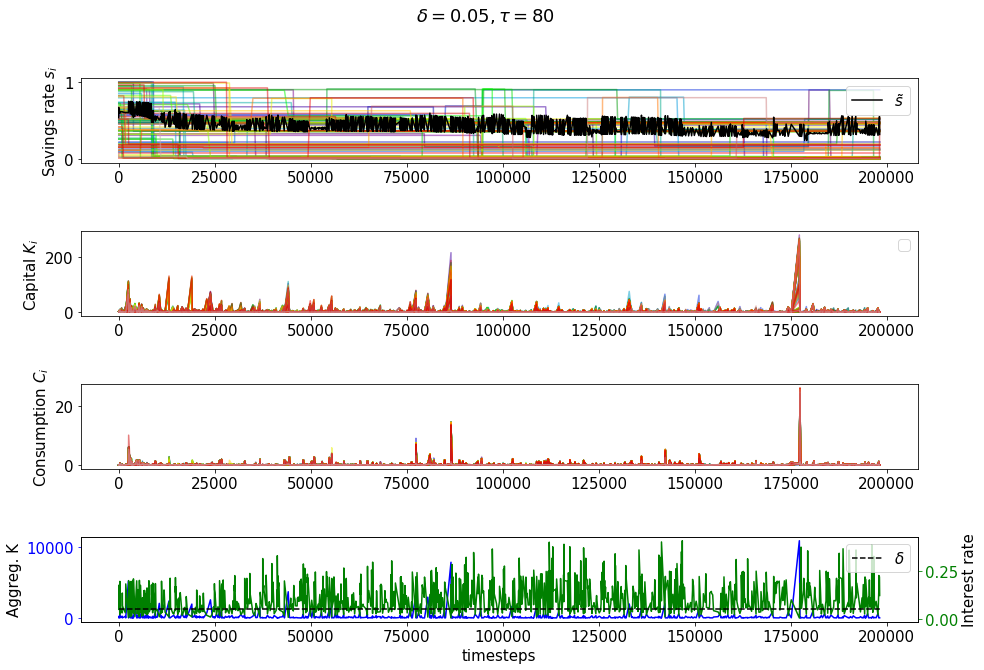

In [11]:
plt.rc('font', size=15)
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,figsize=(15,10))
plt.suptitle(r'$\delta=%s, \tau=%s$'%(np.round(delta/100.,2),tau))
fig.subplots_adjust(hspace = .8, wspace=.01);

start, stop = 0, 1000#len(idx) - 250,len(idx) 
Lim=4
grou=  range(100) #[20,24,70]

nag = len(grou)+1
kidotzero = (w[start:stop] * L[grou]) /  ( ((delta/100.) / (S[start:stop,grou])) - r[start:stop])
kidotzero_low = kidotzero*(kidotzero<Lim)
kidotzero_high = kidotzero*(kidotzero>=Lim)

sincome = S[start:stop,:]* (r[start:stop] * K[start:stop,:] +\
                            w[start:stop] *L[:])

income = (r[start:stop] * K[start:stop,:] +\
                            w[start:stop] *L[:])


for a,i in enumerate(grou):
    ax1.plot(idx[start:stop],S[start:stop,i], 
             c=plt.cm.spectral(float(a+1) / nag), alpha=.5)#label='Househ. %s'%a)
    ax1.set_ylabel(r'Savings rate $s_i$')
    
    ax2.plot(idx[start:stop],K[start:stop,i],#income[i], 
             c=plt.cm.spectral(float(a+1) / nag),alpha=.5)
    ax2.set_ylabel(r'Capital $K_i$')
    ax3.plot(idx[start:stop],C[start:stop,i], 
    #ax3.plot(traj.index[start:stop], traj['r'].values[start:stop] * S[start:stop,i] - delta/100. +\
     #         traj['wage'].values[start:stop] * L[i] * S[start:stop,i],
             c=plt.cm.spectral(float(a+1) / nag),alpha=.5)
    ax3.set_ylabel(r'Consumption $C_i$')


# ax1.plot(traj.index[start:stop], (S[start:stop,:]* (traj['r'].values[start:stop][:,None] * K[start:stop,:] +\
#                                                   traj['wage'].values[start:stop][:,None] *L[:][:,None])).sum(1)/ \
#                                   traj['Y'].values[start:stop][:,None] )
#          c=plt.cm.spectral(float(a+1) / N), alpha=0.55);    
    
ax1.plot(idx[start:stop],(sincome.sum(1) / income.sum(1)),'k',
            label=r'$\tilde{s}$')   
ax1.legend()
#ax1.set_ylim((0,1))
ax3.legend()
# ax2.plot(np.array(idx[start:stop])[np.nonzero(kidotzero_high)[0]],
#     kidotzero_high[np.nonzero(kidotzero_high)],
#     'kx',lw=3,label=r'$\dot{K}_i=0$');
# ax2.plot(np.array(idx[start:stop])[np.nonzero(kidotzero_low)[0]],
#     kidotzero_low[np.nonzero(kidotzero_low)],
#     'kx',lw=3,label=r'$\dot{K}_i=0$');

from collections import OrderedDict
handles, labels = ax2.get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
ax2.legend(by_label.values(), by_label.keys(),loc='upper right',ncol=2)
#ax2.set_yscale('log')
#ax3.set_yscale('log')

#ax2.set_ylim(0,30)
#ax3.set_ylim(0,0.1)
ax4.plot(idx[start:stop],K[start:stop,:].sum(1),c='b');
ax4.set_ylabel('Aggreg. K')

ax5 = ax4.twinx();
ax5.plot(idx[start:stop],r[start:stop],c='g');
ax5.plot(idx[start:stop],delta/100. +0*idx[start:stop],
         'k--',label=r'$\delta$');

ax5.legend(loc='upper right')
ax5.set_ylabel('Interest rate')
ax5.tick_params(axis='y', colors='g')
ax4.tick_params(axis='y', colors='b')
ax4.set_xlabel('timesteps')
#fig.savefig('delta_%s_start%s_stop%s_eps01_phi01_all_tau30.pdf'%(delta,start,stop))


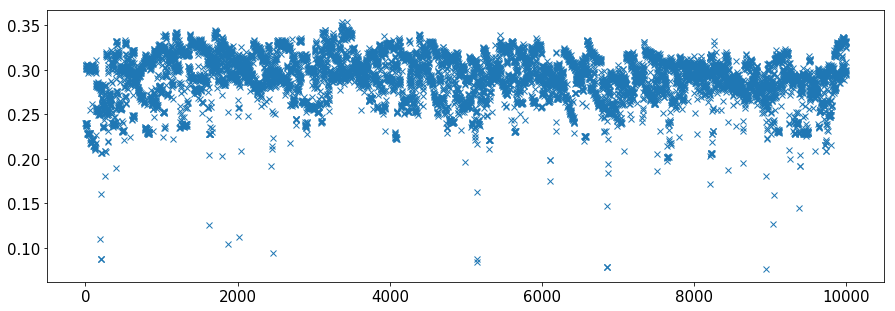

In [34]:
#stop=9000
fig, ax1 = plt.subplots(figsize=(15,5))
ax1.plot((sincome.sum(1) / income.sum(1)) ,'x')
#ax1.plot(np.arange(600,2600), 0.2/(1+ np.exp(0.05*np.arange(2000))) +0.34)

#ax1.plot,'k--')

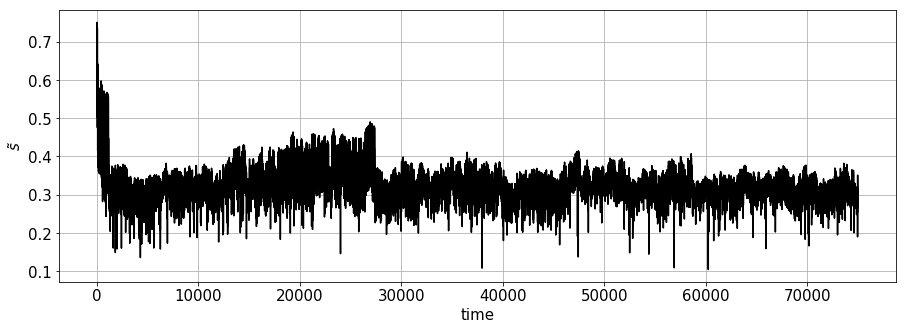

In [10]:
plt.rc('font', size=15)
fig, (ax1) = plt.subplots(figsize=(15,5))
#plt.suptitle(r'$\delta=%s, \tau=%s$'%(np.round(delta/100.,2),tau))
#fig.subplots_adjust(hspace = .8, wspace=.01);

start, stop = 0,75000
sincome = S[start:stop,:]* (r[start:stop] * K[start:stop,:] +\
                            w[start:stop] *L[:])

income = (r[start:stop] * K[start:stop,:] +\
                            w[start:stop] *L[:])

ax1.plot((sincome.sum(1) / income.sum(1)),'k')
ax1.set_ylabel(r'$\tilde{s}$')
ax1.set_xlabel('time')
plt.grid()
#fig.savefig('trajectory_Ldist_tau80_phi01_eps01_fully_long_s_vs_t.pdf')

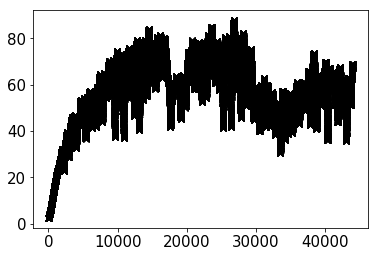

In [56]:
plt.plot(K[start:,:].sum(1), 'kx')

2.28247475272


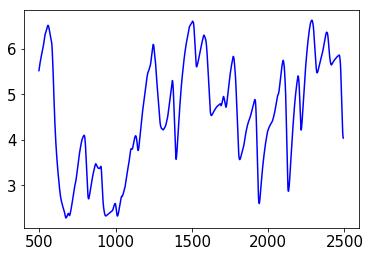

In [58]:
plt.plot(idx[10000:50000],K[10000:50000,:].sum(1),c='b');
print min(K[10000:50000,:].sum(1)) # at tau = 30 we get 13 #tau=20 we get 10 #tau=5 we get 2.3

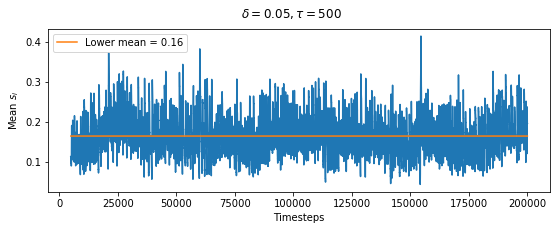

In [67]:
fig, ax = plt.subplots(figsize=(9,3))
plt.suptitle(r'$\delta=%s, \tau=%s$'%(np.round(delta/100.,2),tau))
start, stop = 1000, len(traj.index)
#ax.plot(traj.index[start:stop], S[start:stop].mean(1))

#ax.plot(traj.index[start:stop],traj.index[start:stop]*0 + np.mean(S[start:stop].mean(1)),
#       label = 'Mean = %s'%np.round(np.mean(S[start:stop].mean(1)),2))
y = (S[start:stop,:]* (S[start:stop,:] < 5)).sum(1) /(S[start:stop,:] < 5).sum(1)
ax.plot(idx[start:stop], y)#
ax.plot(traj.index[start:stop],traj.index[start:stop]*0 + np.mean(y),
       label = 'Lower mean = %s'%np.round(np.mean(y),2))


ax.legend()
ax.set_ylabel(r'Mean $s_i$')
ax.set_xlabel('Timesteps')
#fig.savefig('trajectory_Ldist_tau500_phi01_eps01_d50_si_lower.pdf')

41000 58000


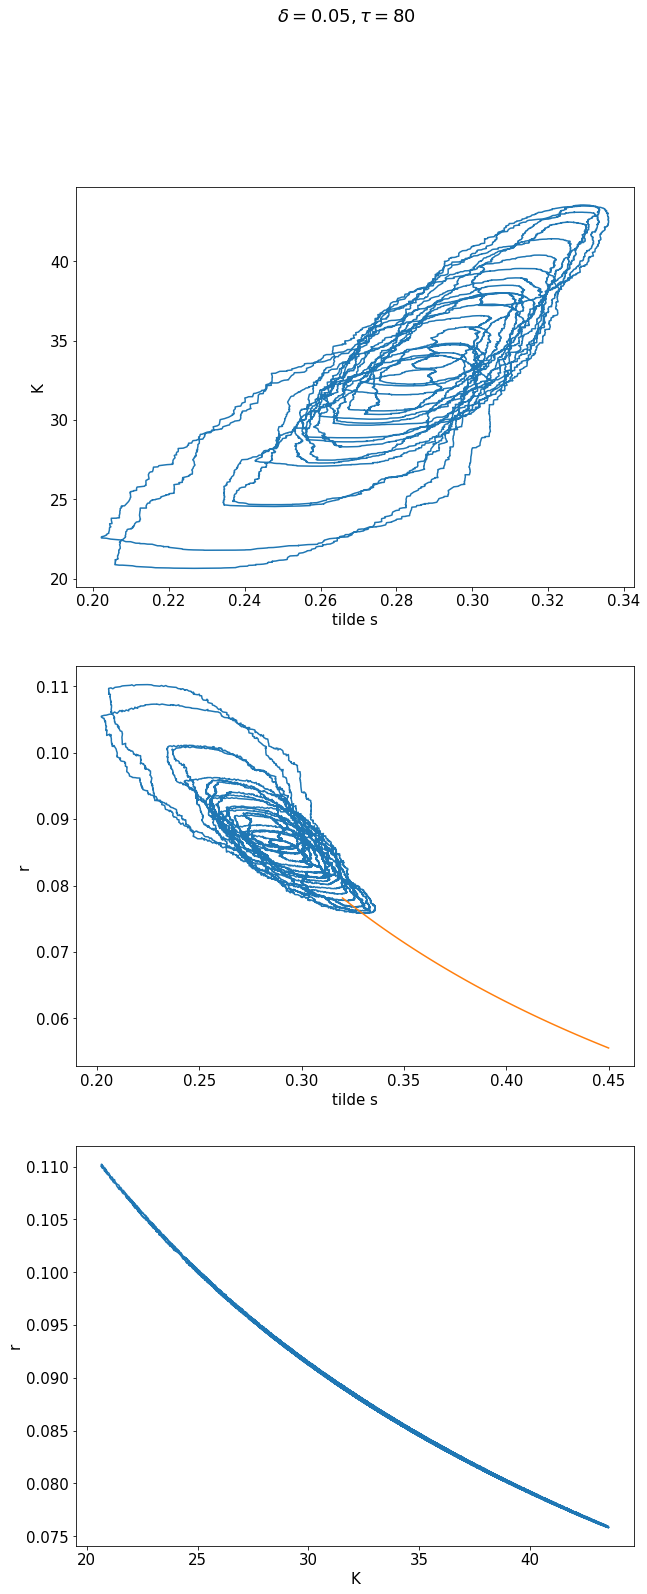

In [59]:
# phaseplots of all individual dynamics
plt.rc('font', size=15)  
fig, (ax1,ax2,ax3) = plt.subplots(3,1,figsize=(10,25))
#fig.subplots_adjust(wspace=1.2);


plt.suptitle(r'$\delta=%s, \tau=%s$'%(np.round(delta/100.,2),tau))
start, stop = 41000,58000 # 1000,3000 # len(traj.index) - 250,len(traj.index) 
print start, stop


sincome = S[start:stop,:]* (r[start:stop] * K[start:stop,:] +\
                            w[start:stop] *L[:])

income = (r[start:stop] * K[start:stop,:] +\
                            w[start:stop] *L[:])

ax1.plot(sincome.sum(1)/income.sum(1), K[start:stop,:].sum(1))
ax1.plot()
ax1.set_ylabel('K')
ax1.set_xlabel('tilde s')
ax2.plot(sincome.sum(1)/income.sum(1), r[start:stop])
ax2.plot(np.linspace(0.32,.45,num=100),(delta/200.)/np.linspace(0.32,.45,num=100))
#ax2.set_xlim((0.3, 0.5))
ax2.set_ylabel('r')
ax2.set_xlabel('tilde s')
ax3.plot(K[start:stop,:].sum(1), r[start:stop])
ax3.set_ylabel('r')
ax3.set_xlabel('K')

30000 34000


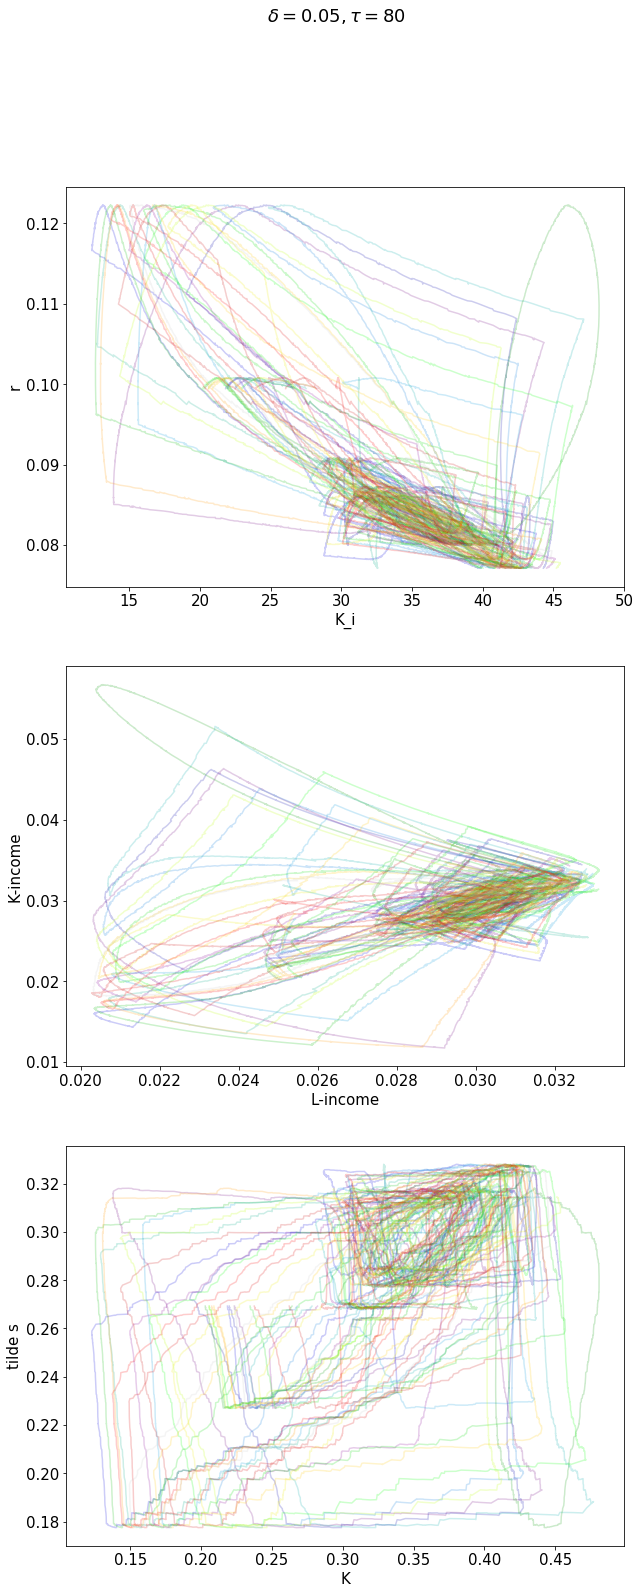

In [3]:
# phaseplots of all individual dynamics
plt.rc('font', size=15)  
fig, (ax1,ax2,ax3) = plt.subplots(3,1,figsize=(10,25))
#fig.subplots_adjust(wspace=1.2);


plt.suptitle(r'$\delta=%s, \tau=%s$'%(np.round(delta/100.,2),tau))
start, stop = 30000,34000 # 1000,3000 # len(traj.index) - 250,len(traj.index) 
print start, stop

sincome = S[start:stop,:]* (r[start:stop] * K[start:stop,:] +\
                            w[start:stop] *L[:])

income = (r[start:stop] * K[start:stop,:] +\
                            w[start:stop] *L[:])

cinc = r[start:stop] * K[start:stop,:]
linc = w[start:stop] * L[:]
Lim=0.05

Nag=20
for a,i in enumerate(range(Nag)):
    ax1.plot(K[start:stop,i],r[start:stop],c=plt.cm.spectral(float(a+1) / Nag),alpha=0.2)
    ax1.set_xlabel('K_i');ax1.set_ylabel('r')
    ax2.plot( linc[:,i],cinc[:,i],c=plt.cm.spectral(float(a+1) / Nag),alpha=0.2)
    ax2.set_xlabel('L-income'); ax2.set_ylabel('K-income')
    ax3.plot( K[start:stop,i],sincome.sum(1)/income.sum(1), c=plt.cm.spectral(float(a+1) / Nag),alpha=0.2)
    ax3.set_xlabel('K');ax3.set_ylabel('tilde s')


#fig.savefig('delta_%s_start%s_stop%s_trajectory_indvs_tau30_phi01_eps01.pdf'%(delta,start,stop))


0.10202115318


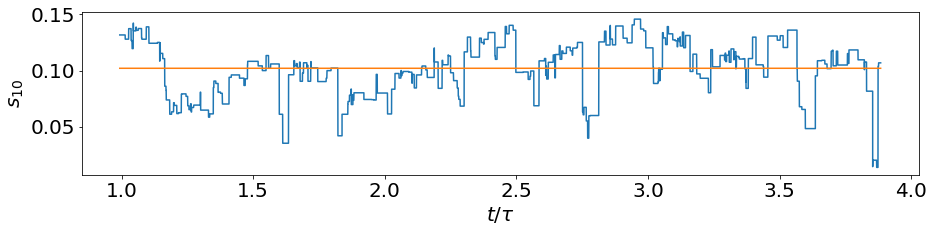

In [353]:
fig2=plt.figure(figsize=(15,3))
ax=fig2.add_subplot(111)

print S[start:stop,:].mean()
ax.plot(idx[start:stop]/tau, S[start:stop,10])
ax.set_ylabel(r'$s_{10}$')
ax.set_xlabel(r'$t/\tau$')
ax.plot(idx[start:stop]/tau, idx[start:stop]*0 + S[start:stop,:].mean())
#fig2.savefig('s10_tau%s.pdf'%tau)

In [355]:
# get avg time spent in high saving state
plt.rc('font', size=20)  

times=[]
sold=2
delt=0
start,stop = 10000,39000
tau = 500.
thresh = 0.5
for agent in range(100):
    tstart=start
    for t in range(start,stop):
        if sold != (S[t,agent] <thresh):
            if (S[t,agent] >thresh):
                times.append( idx[t] - idx[tstart])
            tstart = t
            sold = (S[t,agent] <thresh)
yy=np.array(times)/tau



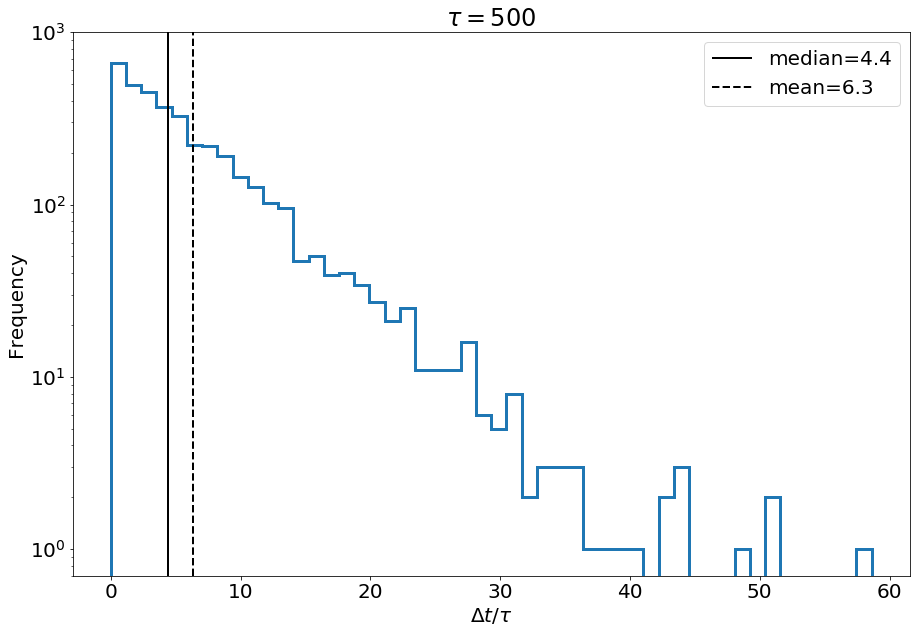

In [357]:
fig2=plt.figure(figsize=(15,10))
ax=fig2.add_subplot(111)
ax.hist(yy,bins=50,log=True,histtype='step',linewidth=3)    
ax.vlines(np.median(yy),0.7,10**3+800, 'k',label='median=%s'%np.round(np.median(yy),1),lw=2)
ax.vlines(yy.mean(),0.7,10**3+800, color='k',linestyle='--',label='mean=%s'%np.round(yy.mean(),1),lw=2)
ax.legend(loc='upper right')
ax.set_xlabel(r'$\Delta t /\tau$')
ax.set_ylabel(r'Frequency')
ax.set_ylim(ymin=0.7,ymax=1000)
ax.set_title(r'$\tau=%s$'%int(tau))
fig2.savefig('high_times_tau%s_start%s_stop%s.pdf'%(tau,start,stop))

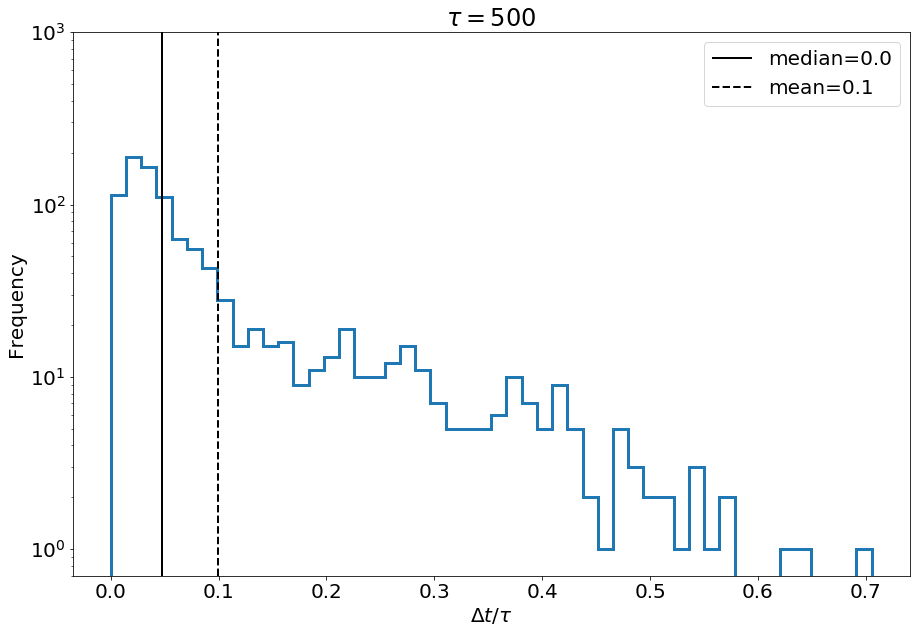

In [10]:
# get avg time spent in high saving state
plt.rc('font', size=20)  

times=[]
sold=2
delt=0
start,stop = 10000,39000
tau = 500.
thresh = 0.5
tstart=start
sincome = S[start:stop,:]* (r[start:stop] * K[start:stop,:] +\
                            w[start:stop] *L[:])

income = (r[start:stop] * K[start:stop,:] +\
                            w[start:stop] *L[:])

ss = sincome.mean(1)/income.mean(1)
for t in range(stop-start):
    if sold != (ss[t] <thresh):
        if (ss[t] >thresh):
            times.append( idx[t+start] - idx[tstart])
        tstart = t+start
        sold = (ss[t] <thresh)
yy=np.array(times)/tau
fig2=plt.figure(figsize=(15,10))
ax=fig2.add_subplot(111)
ax.hist(yy,bins=50,log=True,histtype='step',linewidth=3)    
ax.vlines(np.median(yy),0.7,10**3+800, 'k',label='median=%s'%np.round(np.median(yy),1),lw=2)
ax.vlines(yy.mean(),0.7,10**3+800, color='k',linestyle='--',label='mean=%s'%np.round(yy.mean(),1),lw=2)
ax.legend(loc='upper right')
ax.set_xlabel(r'$\Delta t /\tau$')
ax.set_ylabel(r'Frequency')
ax.set_ylim(ymin=0.7,ymax=1000)
ax.set_title(r'$\tau=%s$'%int(tau))
fig2.savefig('s_times_tau%s_start%s_stop%s.pdf'%(tau,start,stop))


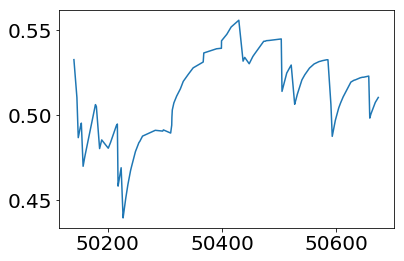

In [13]:
plt.plot(idx[start:start+100],ss[:100])

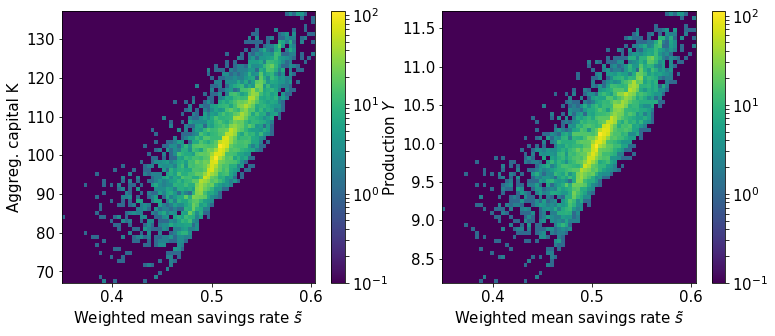

In [63]:
from matplotlib import colors # Phase-heatmaps of MAKRO Variables
fig, (ax,ax1) =plt.subplots(1,2,figsize=(12.5,5))
start,stop = 1000,  11000# len(traj['Y'].values)
#ax.plot(S[start:stop,:].mean(1), traj['Y'].values[start:stop], alpha=0.8)
#ax.plot((K[start:stop,:]*S[start:stop,:]).sum(1)/K[start:stop,:].sum(1),
#        traj['Y'].values[start:stop])


sincome = S[start:stop,:]* (r[start:stop] * K[start:stop,:] +\
                            w[start:stop] *L[:])

income = (r[start:stop] * K[start:stop,:] +\
                            w[start:stop] *L[:])



#     heatmap, xedges, yedges = np.histogram2d(((traj['r'].values[start:stop][3] * S[start:stop,3] - delta/100.)*K[start:stop,3] +\
#               traj['wage'].values[start:stop] * L[3] * S[start:stop,3]), 
#                                                 K[start:stop,3], 
#                                                 bins=[68,68])
heatmap, xedges, yedges = np.histogram2d((sincome.sum(1) / income.sum(1)), 
                                            K[start:stop,:].sum(1), 
                                            bins=[68,68])
heatmap+= 0.1
c = ax.pcolormesh(xedges, yedges, heatmap.T,norm=colors.LogNorm(vmin=heatmap.min(), vmax=heatmap.max()))
plt.colorbar(c,ax=ax)
ax.set_ylabel('Aggreg. capital K')
ax.set_xlabel(r'Weighted mean savings rate $\tilde{s}$')

#fig.savefig('K_vs_s_Ldist_tau500_phi20_eps05.pdf')

heatmap, xedges, yedges = np.histogram2d((sincome.sum(1) / income.sum(1)),  
                                       y[start:stop].T[0], 
                                            bins=[68,68])
heatmap+= 0.1
c = ax1.pcolormesh(xedges, yedges, heatmap.T,norm=colors.LogNorm(vmin=heatmap.min(), vmax=heatmap.max()))
plt.colorbar(c,ax=ax1)
ax1.set_ylabel('Production $Y$')
ax1.set_xlabel(r'Weighted mean savings rate $\tilde{s}$')
fig.savefig('trajectory_Ldist_tau500_phi01_eps01_fully_long_KY_vs_s.pdf')

In [51]:
, r[20000]*K[20000,:] + w[20000]*L

(10000, 1)

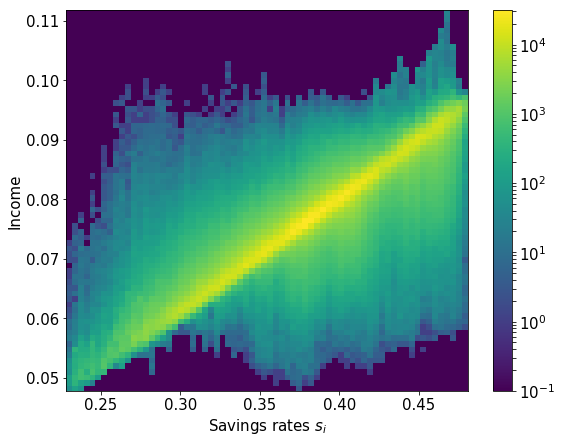

In [40]:
from matplotlib import colors # Phase-heatmaps of MAKRO Variables
fig, ax =plt.subplots(figsize=(9,7))
start,stop = 10000,  50000# len(traj['Y'].values)


heatmap, xedges, yedges = np.histogram2d(S[start:stop,:].ravel(), 
                                            (r[start:stop]*K[start:stop,:] + w[start:stop]*L).ravel()
                                            ,bins=[68,68])
heatmap+= 0.1
c = ax.pcolormesh(xedges, yedges, heatmap.T,norm=colors.LogNorm(vmin=heatmap.min(), vmax=heatmap.max()))
plt.colorbar(c,ax=ax)
ax.set_ylabel('Income')
ax.set_xlabel(r'Savings rates ${s}_i$')

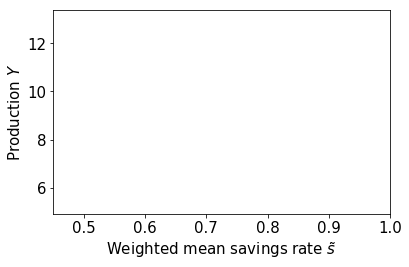

In [32]:
# animate some MAKRO variables

#ax.plot(traj['Y'].values[start:stop], traj['r'].values[start:stop])
import matplotlib.animation as animation
from IPython.display import HTML
plt.rcParams['animation.html'] = 'html5'
import matplotlib.colors as colors

start, stop = 4000, 6000
fig, (ax) = plt.subplots()
ax.set_xlabel(r'Weighted mean savings rate $\tilde{s}$')


ax.set_ylabel(r'Production $Y$')
fig.tight_layout()
#ax.set_prop_cycle(color= [plt.cm.spectral(k) for k in np.linspace(0,1,n_agents)])

# ax2.set_xlabel(r'Savings rate $s_i$')
# ax2.set_xlim((0,1))
# ax2.set_ylim((0,100))

n_points=100
def animate(i):
    for line in lines:
        #line.set_data(S[start+i-n_points:start+i,:].mean(1), traj['Y'].values[start+i-n_points:start+i])
        line.set_data((K[start+i-n_points:start+i,:]*S[start+i-n_points:start+i,:]).sum(1)/\
                      K[start+i-n_points:start+i,:].sum(1),traj['Y'].values[start+i-n_points:start+i])
        line.set_color('k')
        line.set_marker('x')
        line.set_linestyle('-')
            
    return tuple(lines)

def init():
    for a, line in enumerate(lines):
        line.set_data([],[])
        line.set_marker('x')
        line.set_markersize(5)
        line.set_linestyle('--')
        #line.set_markeredgecolor('%s')
        #line.set_color(plt.cm.spectral((a+1) / float(n_agents)))
    
    return lines

lines=[]
lobj = ax.plot([],[],
              color=plt.cm.spectral((k+1.) / n_agents) )[0]
lines.append(lobj)
    
#x = S[start,:n_agents]
#line, = ax.plot(x, K[start,:n_agents])
# ax.set_xlim(( 0, np.max(S[start-n_points:stop,:].mean(1)+0.05)))
# ax.set_ylim((traj['Y'].values[start-n_points:stop].min(), 
#              traj['Y'].values[start-n_points:stop].max()+0.5 ))
ax.set_xlim(( 0.45, 1))
ax.set_ylim((traj['Y'].values[start-n_points:stop].min(), 
             traj['Y'].values[start-n_points:stop].max()+0.5 ))

#ax.set_yscale('log')
#ax.legend([r'$\dot{K}_i=0$'],loc = 'lower right')
ani = animation.FuncAnimation(fig, animate, np.arange(start, stop), init_func=init,
                              interval=50, blit=True)
#HTML(ani.to_html5_video())

/home/yuki/anaconda2/envs/env_full2/lib/python2.7/site-packages/ipykernel_launcher.py:39: RuntimeWarning: divide by zero encountered in divide


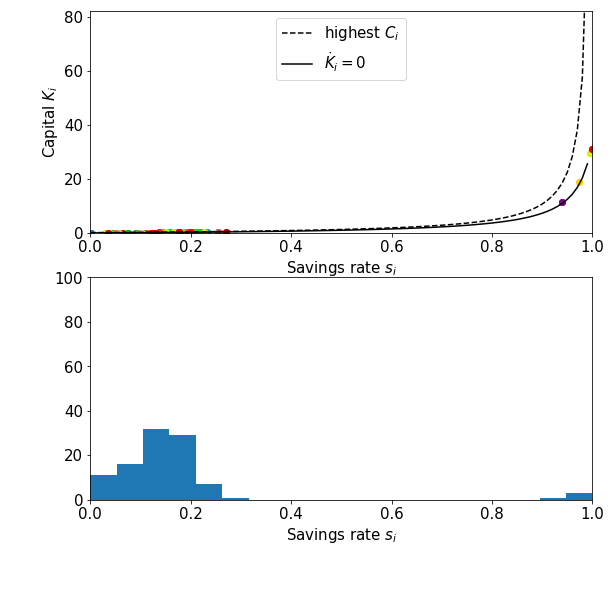

In [46]:
ani.save('eps05_phi05_31500-33500.mp4')

/home/yuki/anaconda2/envs/env_full2/lib/python2.7/site-packages/ipykernel_launcher.py:39: RuntimeWarning: divide by zero encountered in divide


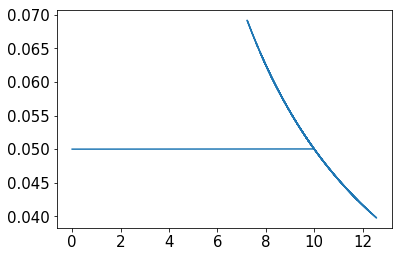

/home/yuki/anaconda2/envs/env_full2/lib/python2.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in double_scalars
/home/yuki/anaconda2/envs/env_full2/lib/python2.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in double_scalars
/home/yuki/anaconda2/envs/env_full2/lib/python2.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: divide by zero encountered in double_scalars
/home/yuki/anaconda2/envs/env_full2/lib/python2.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in double_scalars
/home/yuki/anaconda2/envs/env_full2/lib/python2.7/site-packages/ipykernel_launcher.py:75: RuntimeWarning: divide by zero encountered in double_scalars
/home/yuki/anaconda2/envs/env_full2/lib/python2.7/site-packages/ipykernel_launcher.py:76: RuntimeWarning: divide by zero encountered in double_scalars
/home/yuki/anaconda2/envs/env_full2/lib/python2.7/site-packages/ipykernel_launcher.py:77: Runtim

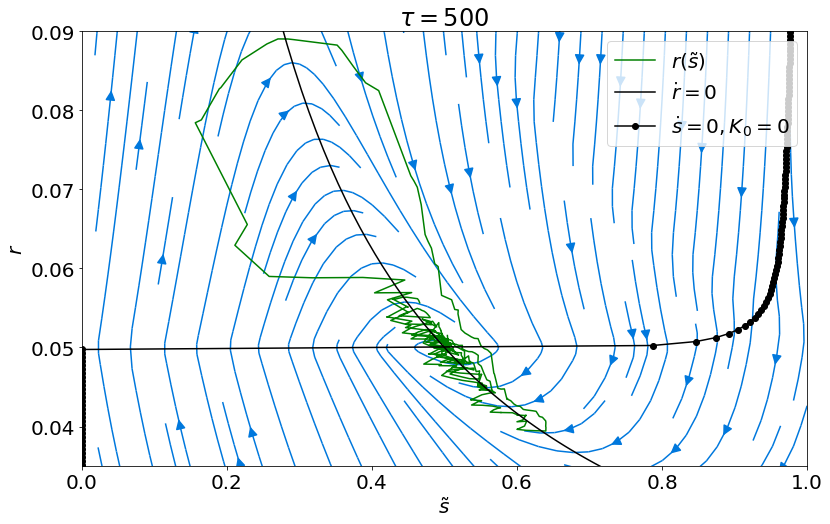

In [87]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from matplotlib import colors, ticker
from scipy.optimize import root, fsolve,brentq,minimize,fminbound
%matplotlib inline
import scipy.integrate as integrate
u = np.linspace(1e-9, 1.-1e-9, 200) # savings rate
#taus = np.logspace(0, 3, 200)  # tau
rs = np.linspace(0.00,0.1,200)
SS, R = np.meshgrid(u, rs)
plt.rc('font', size=20)

#w = 4.16
#r = 0.061
li= .01
delta = 0.05
k0=0. 
tau=500.
#del tau

def c_hat(s,rr):
    D = rr - delta/s
    ww = 0.25/rr
    A = (rr*k0 + ww*li*rr/D ) *np.exp(s*D*tau)
    
    B = ww*li*(1. - rr/D)
    return (1. - s)* (A+B)
#     A = s*r*np.exp(D*s*tau)*(1. - (1.-s)*r*tau) - delta
#     B = (1.-s)*(1- np.exp(D*s*tau))*(r*delta/(s*D))
#     return  A -B
def c_hat_neg(s):
    D = rr - delta/s
    ww = 0.25/rr
    A = (rr*k0 + ww*li*rr/D ) *np.exp(s*D*tau)
    B = ww*li*(1. - rr/D)
    return -(1. - s)* (A+B)

Z=SS.copy()
for a,rr in enumerate(rs):
    for b, s in enumerate(u):
        Z[a,b]= c_hat(s,rr)
sroot=[]
for rr in rs:
    sroot.append(fminbound(c_hat_neg,1e-7,1., maxfun=40000,xtol=1e-12 ))
    
#############
# k0=20. 
# tau=500.
# #del tau
# sroot2=[]

# def c_hat_neg(s):
#     D = rr - delta/s
#     ww = 0.25/rr
#     A = (rr*k0 + ww*li*rr/D ) *np.exp(s*D*tau)
#     B = ww*li*(1. - rr/D)
#     return -(1. - s)* (A+B)

# for rr in rs:
#     sroot2.append(fminbound(c_hat_neg,1e-7,1., maxfun=40000,xtol=1e-12 ))
##############
fig2=plt.figure(figsize=(13,8))
ax=fig2.add_subplot(111)
#c = ax.contourf(SS,R, Z, zdir='z',norm=colors.LogNorm(vmin=Z.min(),vmax=Z.max()))
# ax.plot(S[start:stop,0], r[start:stop],linestyle='--',label='Househ. %s'%0,
#        c=plt.cm.spectral((2./ 5)))
# ax.plot(S[start:stop,1], r[start:stop],linestyle='--',label='Househ. %s'%1,
#        c=plt.cm.spectral((5.)/ 5))


k0=0
def f(Y, t):
    s, rr = Y
    D = rr- delta/s
    ww= 0.25/rr
    gamma = k0*rr*D + ww *li*rr
    A = s*gamma*np.exp(D*s*tau)* (1. - (1.-s)*rr*tau) - delta*ww*li
    B = (1.-s)*(1- np.exp(D*s*tau))*(rr*ww*li*delta/(s*D))
    sdot = np.sign(A-B)/tau 
    kk = 1./(4*rr*rr) +k0*10
    rdot =  -s*rr*rr +delta*rr/2.
    return [sdot, rdot]

s1 = np.linspace(.0,1. , 100)
r2 = np.linspace(.0, .1, 100)

S1, R2 = np.meshgrid(s1, r2)

u, v = np.zeros(S1.shape), np.zeros(R2.shape)

NI, NJ = S1.shape

for i in range(NI):
    for j in range(NJ):
        x = S1[i, j]
        y = R2[i, j]
        yprime = f([x, y], t)
        u[i,j] = yprime[0]
        v[i,j] = yprime[1]

ax.streamplot(S1, R2, u, v,color=plt.cm.spectral(1./ 4),density=1.2,arrowsize=2) #np.sign(v)*np.exp(v)
       
start, stop = 30500, 31000#,20000 
sincome = S[start:stop,:]* (r[start:stop] * K[start:stop,:] +\
                            w[start:stop] *L[:])

income = (r[start:stop] * K[start:stop,:] +\
                            w[start:stop] *L[:])



ax.plot(sincome.sum(1)/income.sum(1), r[start:stop],c='g',label=r'$r(\tilde{s})$')
#ax.plot((S[start:stop,:]* K[start:stop,:]).sum(1)/K[start:stop,:].sum(1), r[start:stop],'k') 
ax.plot(np.linspace(0,1,100), 0.05/(2*np.linspace(0,1,100)),'k',label=r'$\dot{r}=0$')
ax.plot(sroot,rs,'ko-',label=r'$\dot{s}=0,K_0=0$')
#ax.plot(sroot2,rs,'k^-',label=r'$\dot{s}=0,K_0=%s$'%int(k0))

#cb = plt.colorbar(c)
ll= ax.legend(ncol=1,loc='upper right');#frame= ll.get_frame();frame.set_facecolor('tan');frame.set_edgecolor('black')
ax.set_ylabel(r'$r$')
ax.set_xlabel(r'$\tilde{s}$')
ax.set_ylim((0.035,0.09))
ax.set_xlim((0,1.))
ax.set_aspect('auto')
ax.set_title(r'$\tau=$%s'%int(tau))
fig2.savefig('phase_500_%s_%s.pdf'%(start,stop))

/home/yuki/anaconda2/envs/env_full2/lib/python2.7/site-packages/ipykernel_launcher.py:75: RuntimeWarning: divide by zero encountered in double_scalars
/home/yuki/anaconda2/envs/env_full2/lib/python2.7/site-packages/ipykernel_launcher.py:77: RuntimeWarning: invalid value encountered in double_scalars
/home/yuki/anaconda2/envs/env_full2/lib/python2.7/site-packages/ipykernel_launcher.py:78: RuntimeWarning: invalid value encountered in double_scalars
/home/yuki/anaconda2/envs/env_full2/lib/python2.7/site-packages/ipykernel_launcher.py:79: RuntimeWarning: invalid value encountered in double_scalars
/home/yuki/anaconda2/envs/env_full2/lib/python2.7/site-packages/ipykernel_launcher.py:113: RuntimeWarning: divide by zero encountered in divide


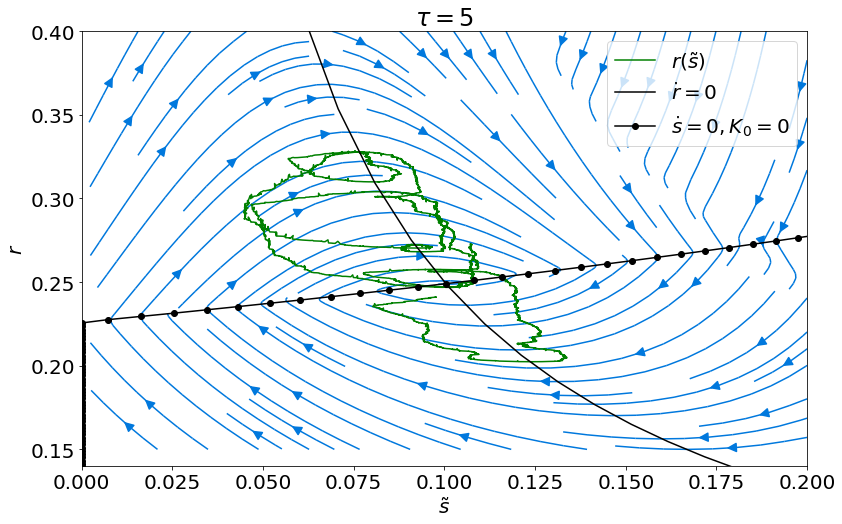

In [71]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from matplotlib import colors, ticker
from scipy.optimize import root, fsolve,brentq,minimize,fminbound
%matplotlib inline
import scipy.integrate as integrate
u = np.linspace(1e-9, 1.-1e-9, 200) # savings rate
#taus = np.logspace(0, 3, 200)  # tau
rs = np.linspace(0.01,0.4,200)
SS, R = np.meshgrid(u, rs)
plt.rc('font', size=20)

#w = 4.16
#r = 0.061
li= .01
delta = 0.05
k0=0. 
tau=5.
#del tau

def c_hat(s,rr):
    D = rr - delta/s
    ww = 0.25/rr
    A = (rr*k0 + ww*li*rr/D ) *np.exp(s*D*tau)
    
    B = ww*li*(1. - rr/D)
    return (1. - s)* (A+B)
#     A = s*r*np.exp(D*s*tau)*(1. - (1.-s)*r*tau) - delta
#     B = (1.-s)*(1- np.exp(D*s*tau))*(r*delta/(s*D))
#     return  A -B
def c_hat_neg(s):
    D = rr - delta/s
    ww = 0.25/rr
    A = (rr*k0 + ww*li*rr/D ) *np.exp(s*D*tau)
    B = ww*li*(1. - rr/D)
    return -(1. - s)* (A+B)

Z=SS.copy()
for a,rr in enumerate(rs):
    for b, s in enumerate(u):
        Z[a,b]= c_hat(s,rr)
sroot=[]
for rr in rs:
    sroot.append(fminbound(c_hat_neg,1e-7,1., maxfun=40000,xtol=1e-12 ))
    
#############
# k0=20. 
# tau=500.
# #del tau
# sroot2=[]

# def c_hat_neg(s):
#     D = rr - delta/s
#     ww = 0.25/rr
#     A = (rr*k0 + ww*li*rr/D ) *np.exp(s*D*tau)
#     B = ww*li*(1. - rr/D)
#     return -(1. - s)* (A+B)

# for rr in rs:
#     sroot2.append(fminbound(c_hat_neg,1e-7,1., maxfun=40000,xtol=1e-12 ))
##############
fig2=plt.figure(figsize=(13,8))
ax=fig2.add_subplot(111)
#c = ax.contourf(SS,R, Z, zdir='z',norm=colors.LogNorm(vmin=Z.min(),vmax=Z.max()))
# ax.plot(S[start:stop,0], r[start:stop],linestyle='--',label='Househ. %s'%0,
#        c=plt.cm.spectral((2./ 5)))
# ax.plot(S[start:stop,1], r[start:stop],linestyle='--',label='Househ. %s'%1,
#        c=plt.cm.spectral((5.)/ 5))


k0=0
def f(Y, t):
    s, rr = Y
    D = rr- delta/s
    ww= 0.25/rr
    gamma = k0*rr*D + ww *li*rr
    A = s*gamma*np.exp(D*s*tau)* (1. - (1.-s)*rr*tau) - delta*ww*li
    B = (1.-s)*(1- np.exp(D*s*tau))*(rr*ww*li*delta/(s*D))
    sdot = 0.01*np.sign(A-B)/tau 
    kk = 1./(4*rr*rr) +k0*10
    rdot =  -s*rr*rr +delta*rr/2.
    return [sdot, rdot]

s1 = np.linspace(.0,0.2, 100)
r2 = np.linspace(.15, .4, 100)

S1, R2 = np.meshgrid(s1, r2)

u, v = np.zeros(S1.shape), np.zeros(R2.shape)

NI, NJ = S1.shape

for i in range(NI):
    for j in range(NJ):
        x = S1[i, j]
        y = R2[i, j]
        yprime = f([x, y], t)
        u[i,j] = yprime[0]
        v[i,j] = yprime[1]

ax.streamplot(S1, R2, u, v,color=plt.cm.spectral(1./ 4),density=1.,arrowsize=2) #np.sign(v)*np.exp(v)
       
start, stop = 15000, 26000#,20000 
sincome = S[start:stop,:]* (r[start:stop] * K[start:stop,:] +\
                            w[start:stop] *L[:])

income = (r[start:stop] * K[start:stop,:] +\
                            w[start:stop] *L[:])



ax.plot(sincome.sum(1)/income.sum(1), r[start:stop],c='g',label=r'$r(\tilde{s})$')
#ax.plot((S[start:stop,:]* K[start:stop,:]).sum(1)/K[start:stop,:].sum(1), r[start:stop],'k') 
ax.plot(np.linspace(0,1,100), 0.05/(2*np.linspace(0,1,100)),'k',label=r'$\dot{r}=0$')
ax.plot(sroot,rs,'ko-',label=r'$\dot{s}=0,K_0=0$')
#ax.plot(sroot2,rs,'k^-',label=r'$\dot{s}=0,K_0=%s$'%int(k0))

#cb = plt.colorbar(c)
ll= ax.legend(ncol=1,loc='upper right');#frame= ll.get_frame();frame.set_facecolor('tan');frame.set_edgecolor('black')
ax.set_ylabel(r'$r$')
ax.set_xlabel(r'$\tilde{s}$')
ax.set_ylim((0.14,0.4))
ax.set_xlim((0,0.2))
ax.set_aspect('auto')
ax.set_title(r'$\tau=$%s'%int(tau))
fig2.savefig('phase_5_%s_%s.pdf'%(start,stop))

/home/yuki/anaconda2/envs/env_full2/lib/python2.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in double_scalars
/home/yuki/anaconda2/envs/env_full2/lib/python2.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in double_scalars
/home/yuki/anaconda2/envs/env_full2/lib/python2.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in double_scalars
/home/yuki/anaconda2/envs/env_full2/lib/python2.7/site-packages/ipykernel_launcher.py:44: RuntimeWarning: divide by zero encountered in double_scalars
/home/yuki/anaconda2/envs/env_full2/lib/python2.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in double_scalars
/home/yuki/anaconda2/envs/env_full2/lib/python2.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars
/home/yuki/anaconda2/envs/env_full2/lib/python2.7/site-packages/ipykernel_launcher.py:47: Runtime

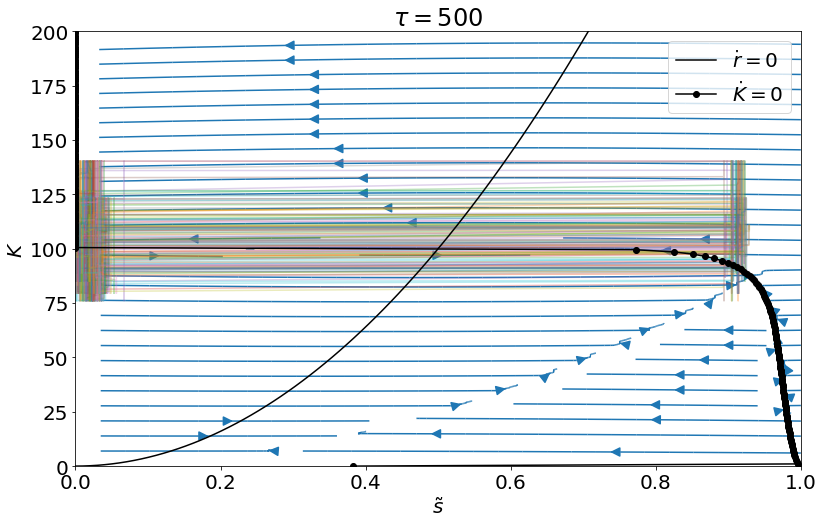

In [21]:
# with Kdot
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from matplotlib import colors, ticker
from scipy.optimize import root, fsolve,brentq,minimize,fminbound
%matplotlib inline
import scipy.integrate as integrate

plt.rc('font', size=20)

#w = 4.16
#r = 0.061
li= .007
delta = 0.05
k0=0. 
tau=500.



def c_hat_neg(s):
    rr = np.sqrt(0.25/KK)
    k0=KK/100.
    D = rr - delta/s
    ww = 0.25/rr
    A = (rr*k0 + ww*li*rr/D ) *np.exp(s*D*tau)
    B = ww*li*(1. - rr/D)
    return -(1. - s)* (A+B)


Ks = np.linspace(0.,200.,200)
sroot=[]
for KK in Ks:
    sroot.append(fminbound(c_hat_neg,1e-7,1., maxfun=40000,xtol=1e-12 ))
    

fig2=plt.figure(figsize=(13,8))
ax=fig2.add_subplot(111)


def f(Y, t):
    s, KK = Y
    k0= KK/100.
    rr = np.sqrt(0.25/KK)
    D = rr- delta/s
    ww= 0.25/rr
    gamma = k0*rr*D + ww *li*rr
    A = s*gamma*np.exp(D*s*tau)* (1. - (1.-s)*rr*tau) - delta*ww*li
    B = (1.-s)*(1- np.exp(D*s*tau))*(rr*ww*li*delta/(s*D))
    sdot = np.sign(A-B)
    Kdot =  s*np.sqrt(KK) - delta*KK
    return [sdot, Kdot]

s1 = np.linspace(.0,1, 100)

S1, K2 = np.meshgrid(s1, Ks)

u, v = np.zeros(S1.shape), np.zeros(K2.shape)

NI, NJ = S1.shape

for i in range(NI):
    for j in range(NJ):
        x = S1[i, j]
        y = K2[i, j]
        yprime = f([x, y], t)
        u[i,j] = yprime[0]
        v[i,j] = yprime[1]

ax.streamplot(S1, K2, u, v,density=1.,arrowsize=2) #np.sign(v)*np.exp(v)
       
start, stop = 15000, 15500#,20000 
sincome = S[start:stop,:]* (r[start:stop] * K[start:stop,:] +\
                            w[start:stop] *L[:])

income = (r[start:stop] * K[start:stop,:] +\
                            w[start:stop] *L[:])



#ax.plot(sincome.sum(1)/income.sum(1), K[start:stop,:].sum(1),c='g',label=r'$K(\tilde{s})$')
ax.plot(S[start:stop,:],K[start:stop,:].sum(1),alpha=0.3) 
ax.plot(np.linspace(0,1,100), np.power(np.linspace(0,1,100),2)/(delta*delta),'k',label=r'$\dot{r}=0$')
ax.plot(sroot,Ks,'ko-',label=r'$\dot{K}=0$')
#ax.plot(sroot2,rs,'k^-',label=r'$\dot{s}=0,K_0=%s$'%int(k0))

#cb = plt.colorbar(c)
ll= ax.legend(ncol=1,loc='upper right');#frame= ll.get_frame();frame.set_facecolor('tan');frame.set_edgecolor('black')
ax.set_ylabel(r'$K$')
ax.set_xlabel(r'$\tilde{s}$')
ax.set_ylim((0.0,200))
ax.set_xlim((0,1))
ax.set_aspect('auto')
ax.set_title(r'$\tau=$%s'%int(tau))

/home/yuki/anaconda2/envs/env_full2/lib/python2.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in double_scalars
/home/yuki/anaconda2/envs/env_full2/lib/python2.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in double_scalars
/home/yuki/anaconda2/envs/env_full2/lib/python2.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in double_scalars


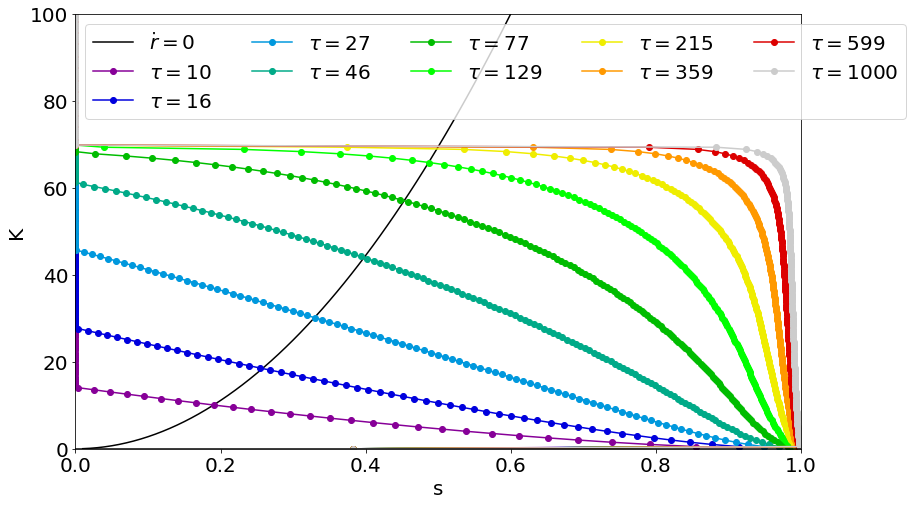

In [144]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from matplotlib import colors, ticker
from scipy.optimize import root, fsolve,brentq,minimize,fminbound
%matplotlib inline
import scipy.integrate as integrate
u = np.linspace(1e-9, 1.-1e-9, 200) # savings rate
#taus = np.logspace(0, 3, 200)  # tau
SS, R = np.meshgrid(u, rs)
plt.rc('font', size=20)

#w = 4.16
#r = 0.061
li= .01
delta = 0.06
k0=0. 

def c_hat_neg(s):
    rr = np.sqrt(0.25/K)
    D = rr - delta/s
    ww = 0.25/rr
    A = (rr*k0 + ww*li*rr/D ) *np.exp(s*D*tau)
    B = ww*li*(1. - rr/D)
    return -(1. - s)* (A+B)

fig2=plt.figure(figsize=(13,8))
ax=fig2.add_subplot(111)
ax.plot(np.linspace(0.01,1,100), np.power(np.linspace(0.01,1,100),2)/(delta*delta),'k',label=r'$\dot{r}=0$')

Ks = np.linspace(0.,100,200)
taus=np.logspace(1,3,10)
for a,tau in enumerate(taus):
    sroot=[]
    for K in Ks:  
        sroot.append(fminbound(c_hat_neg,1e-7,1., maxfun=40000,xtol=1e-12 ))
    ax.plot(sroot,Ks,c=plt.cm.spectral((a+1.)/len(taus)),label=r'$\tau=%s$'%int(tau),marker='o')
ax.legend(loc = 'upper left' , ncol=5)

ax.set_ylim((0.0,100))
ax.set_xlim((0,1))
ax.axhline(0.06,color='k',label=r'$\delta$')
ax.set_xlabel('s')
ax.set_ylabel('K')

/home/yuki/anaconda2/envs/env_full2/lib/python2.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in double_scalars
/home/yuki/anaconda2/envs/env_full2/lib/python2.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in double_scalars
/home/yuki/anaconda2/envs/env_full2/lib/python2.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in double_scalars


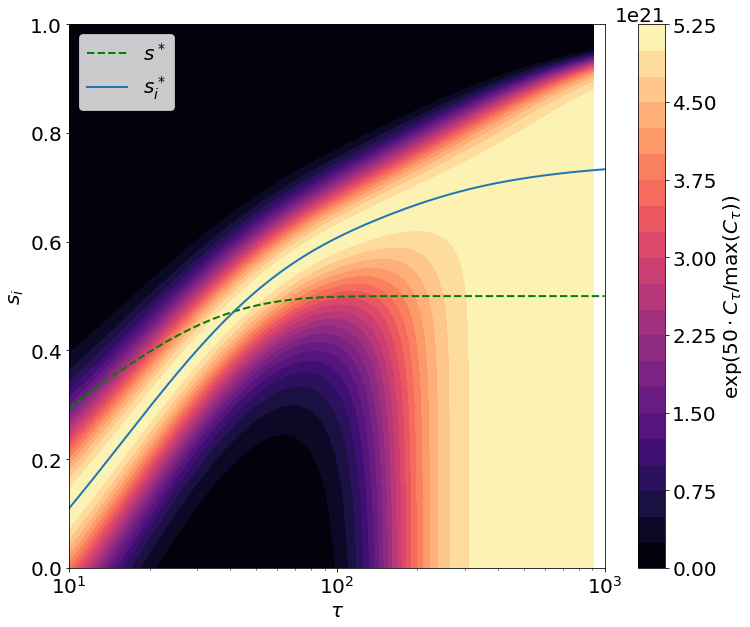

In [15]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from matplotlib import colors, ticker
from scipy.optimize import root, fsolve,brentq,minimize,fminbound
%matplotlib inline
import scipy.integrate as integrate
u = np.linspace(1e-9, 1, 200) # savings rate
taus = np.logspace(1, 3, 150)  # tau
SS, T = np.meshgrid(u, taus)
plt.rc('font', size=20)

li= .01
delta = 0.06

def c_hat(s,tau):
    a = np.exp(-tau*1.3*delta/2)
    ss = ((a-1)/(a-2)) 
    rr = delta/(2*ss)
    ww = ss/(2*delta)
    k0= 0.03*ss*ss /(delta*delta)
    D = rr - delta/s
    
    A = (rr*k0 + ww*li*rr/D ) *np.exp(s*D*tau)
    B = ww*li*(1. - rr/D)
    return (1. - s)* (A+B)

def c_hat_neg(s):
    return -c_hat(s,tau)

Z=SS.copy()
for a,tau in enumerate(taus):
    for b, s in enumerate(u):
        Z[a,b]= c_hat(s,tau)
sroot=[]
for tau in taus:
    sroot.append(fminbound(c_hat_neg,1e-7,1., maxfun=40000,xtol=1e-12 ))
Z2 = Z/Z.max(1)[:,None]
Z2 = np.exp(50*Z2)


fig,ax = plt.subplots()
fig.set_size_inches((12,10))

c = ax.contourf(T,SS, Z2,20, cmap='magma')# norm=colors.LogNorm(vmin=Z.min(),vmax=Z.max()))
aa = np.exp(-taus*1.8*delta/2)
ax.semilogx(taus, (aa-1)/(aa-2), 'g--',lw=2,label=r'$s^*$')

ax.semilogx(taus, sroot, label=r'$s_i^*$',lw=2)
plt.colorbar(c, label=r'$\mathrm{exp}(50 \cdot C_\tau/\mathrm{max}(C_\tau))$')
ax.legend(loc='upper left')
ax.set_ylabel(r'$s_i$')
ax.set_xlabel(r'$\tau$')
ax.set_aspect('auto')
ax.set_xscale('log')
#fig.savefig('freerider_si_k0_005.pdf')

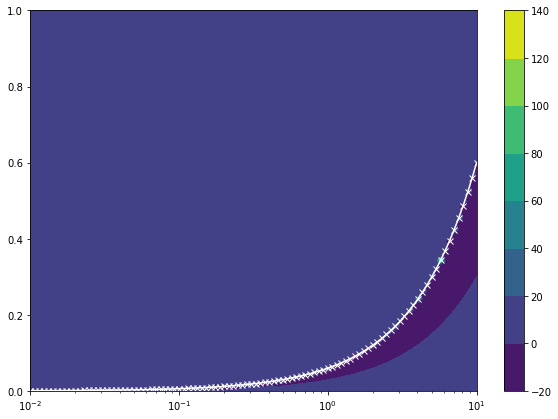

In [63]:
fig2=plt.figure(figsize=(10,7))
ax=fig2.add_subplot(111)
#Z=Z*(Z>0)
c = ax.contourf(T, S, Z, zdir='z') #,levels=np.linspace(np.nanmin(Z),np.nanmax(Z),30))#,norm=colors.LogNorm(),levels=np.logspace(.8,18))
ax.plot(taus, sroot,'wx-',label='Numerical max')
ax.set_xscale('log')
cb = plt.colorbar(c)
# cb.set_ticks(np.logspace(.8,3,9))
# cb.set_ticklabels(np.logspace(.8,3,9))
# def fmt(x, pos):
#     a, b = '{:.0e}'.format(x).split('e')
#     b = int(b)
#     return r'$ 10^{{{}}}$'.format(b)

In [77]:
max(sroot)

0.59309755093537753